# Graph Embeddings

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder
from karateclub import Graph2Vec

plt.style.use("seaborn")

/var/folders/z0/fjd_zzt54wn4jz8t737zsf6h0000gn/T/ipykernel_26875/1613137914.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


### Node Embeddings

Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 318.40it/s]


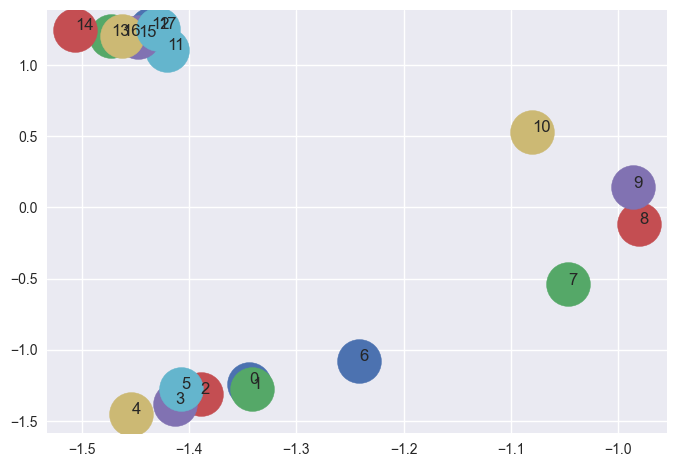

In [2]:
G = nx.barbell_graph(
    m1=7,
    m2=4
)

mdl = Node2Vec(
    G, 
    dimensions=2
)
mdl = mdl.fit(window=10)

fig, ax = plt.subplots()
for x in G.nodes():
    v = mdl.wv.get_vector(str(x))
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

### Edge Embeddings

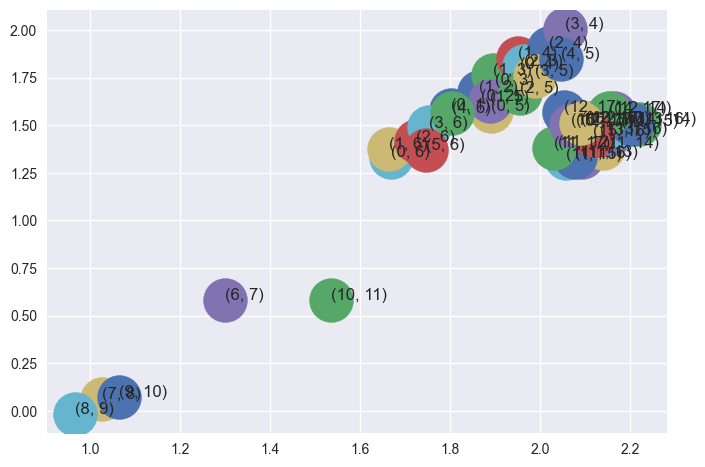

In [3]:
edges_embs = HadamardEmbedder(keyed_vectors=mdl.wv)
fig, ax = plt.subplots()
for x in G.edges():
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

### Graph Embeddings

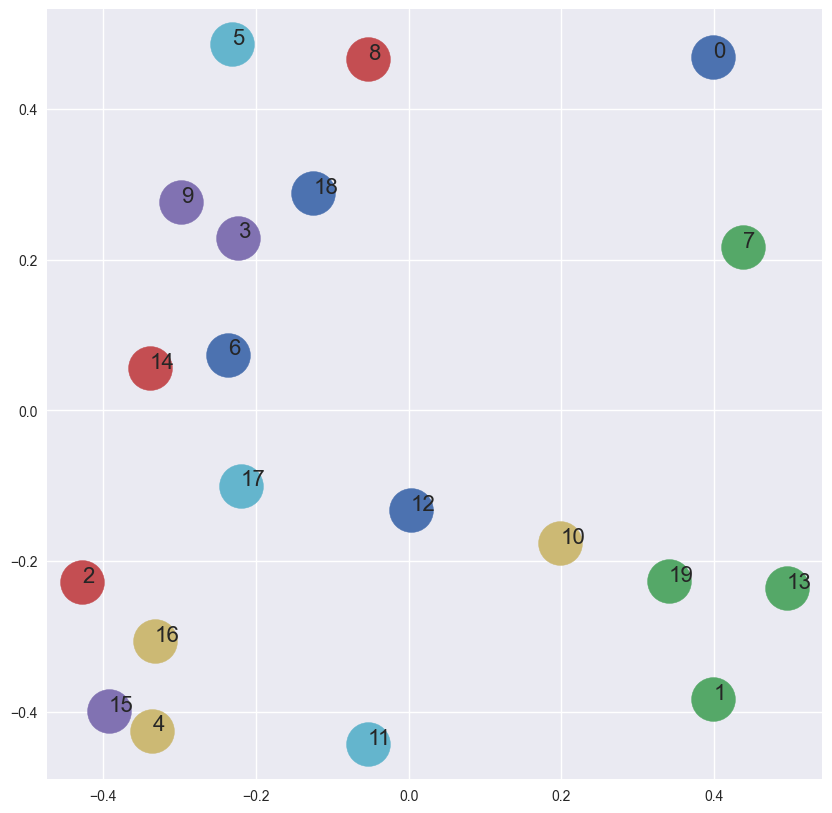

In [4]:
n_graphs = 20
def generate_random():
    n = random.randint(5, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p)
Gs = [generate_random() for x in range(n_graphs)]
g_mdl = Graph2Vec(dimensions=2)
g_mdl.fit(Gs)
embeddings = g_mdl.get_embedding()
fig, ax = plt.subplots(figsize=(10,10))
for i,vec in enumerate(embeddings):
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=16)

---